#  Buoi 07 | 11/05/2021

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1__qrPH_smxOJ285PGXzJcoMgAky3psTk/view?usp=sharing)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
# plt.style.use('seaborn-white')
# sns.set_theme(color_codes=True, palette="crest")
sns.set()

In [5]:
# advertising = pd.read_csv('Data/Advertising.csv')
advertising = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 07 11 05 2021/Data/Advertising.csv').drop('Unnamed: 0', axis='columns')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
print('TV: ', max(advertising.TV), min(advertising.TV))
print('radio: ', max(advertising.Radio), min(advertising.Radio))
print('newspaper: ', max(advertising.Newspaper), min(advertising.Newspaper))

TV:  296.4 0.7
radio:  49.6 0.0
newspaper:  114.0 0.3


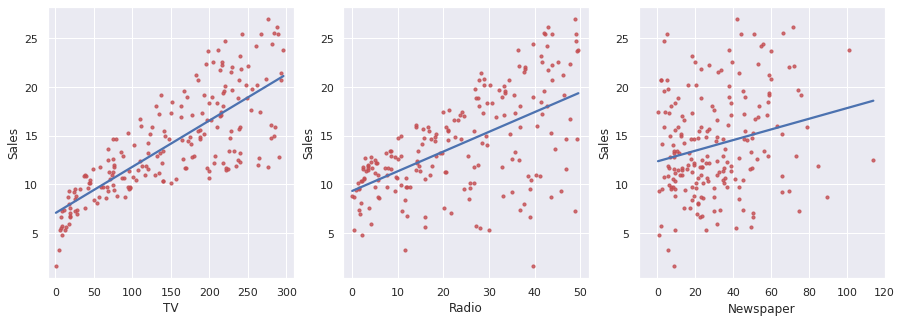

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(ax = axes[0], x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's': 10})
axes[0].set_xlim([-10, 310])
sns.regplot(ax = axes[1], x=advertising.Radio, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's': 10})
axes[1].set_xlim([-2, 52])
sns.regplot(ax = axes[2], x=advertising.Newspaper, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's': 10})
_ = axes[2].set_xlim([-10, 120])

In [12]:
TV_only = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 07 11 05 2021/Data/Advertising.csv', usecols=[1, 4])
TV_only.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [13]:
np.mean(advertising.TV)

147.0425

In [14]:
reg = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1, 1)
max(X), min(X)

(array([149.3575]), array([-146.3425]))

In [15]:
y = advertising.Sales
reg.fit(X, y)
print(reg.intercept_)
print(reg.coef_)

14.0225
[0.04753664]


In [16]:
w0 = np.linspace(reg.intercept_-2, reg.intercept_+2, 50)
w1 = np.linspace(reg.coef_-0.02, reg.coef_+0.02, 50)
xx, yy = np.meshgrid(w0, w1, indexing='xy')
Z = np.zeros((w0.size,w1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),_ in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/200

# Minimized RSS
min_RSS = r'w0, w1 for minimized RSS'
min_rss = np.sum((reg.intercept_+reg.coef_*X - y.values.reshape(-1,1))**2)/200
min_rss

10.512652915656757

In [17]:
Z.max()

17.446290973156763

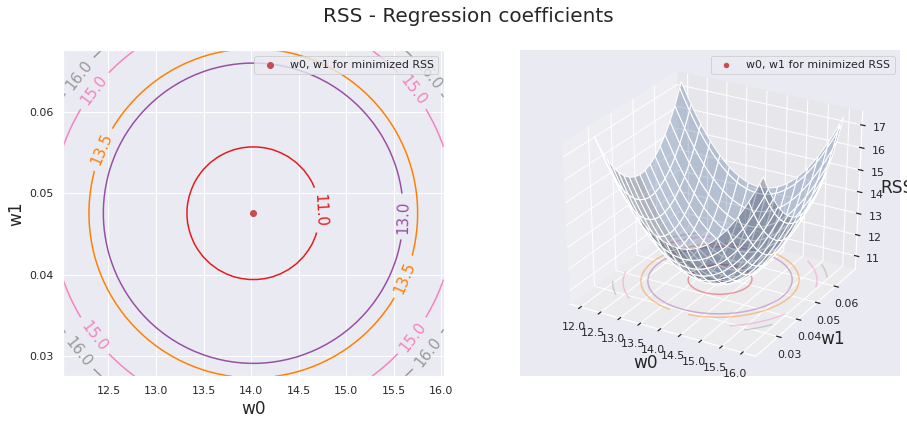

In [18]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[11, 13, 13.5, 15, 16])
ax1.scatter(reg.intercept_, reg.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=15, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[11, 13, 13.5, 15, 16])
ax2.scatter3D(reg.intercept_, reg.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS', fontsize=17)
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'w0', fontsize=17)
    ax.set_ylabel(r'w1', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

In [19]:
# p-value
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [20]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [21]:
est.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [22]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [23]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           4.35e-19
Time:                        07:54:31   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
est.pvalues

Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64

In [25]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [26]:
est.pvalues

Intercept    4.713507e-49
Newspaper    1.148196e-03
dtype: float64

In [27]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        07:54:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [29]:
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Thu, 20 Jan 2022",Prob (F-statistic):,1.58e-96
Time:,07:54:52,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


In [30]:
# measure model fit
# R2
est_all = smf.ols('Sales ~ Newspaper + Radio + TV', advertising).fit()
est_TV = smf.ols('Sales ~ TV', advertising).fit()
est_not_newspaper = smf.ols('Sales ~ Radio + TV', advertising).fit()
est_all.rsquared, est_TV.rsquared, est_not_newspaper.rsquared

(0.8972106381789522, 0.611875050850071, 0.8971942610828956)

In [31]:
# Residual standard error
print((est_all.mse_resid) ** 0.5, (est_not_newspaper.mse_resid) ** 0.5, (est_TV.mse_resid) ** 0.5)

1.685510373414744 1.681360912508001 3.258656368650463


In [32]:
# Draw with sklearn
reg_sk = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']]
y = advertising.Sales

reg_sk.fit(X,y)
print(reg_sk.coef_)
print(reg_sk.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [33]:
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [34]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

w1, w2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(reg_sk.intercept_ + w1[i,j]*reg_sk.coef_[0] + w2[i,j]*reg_sk.coef_[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  


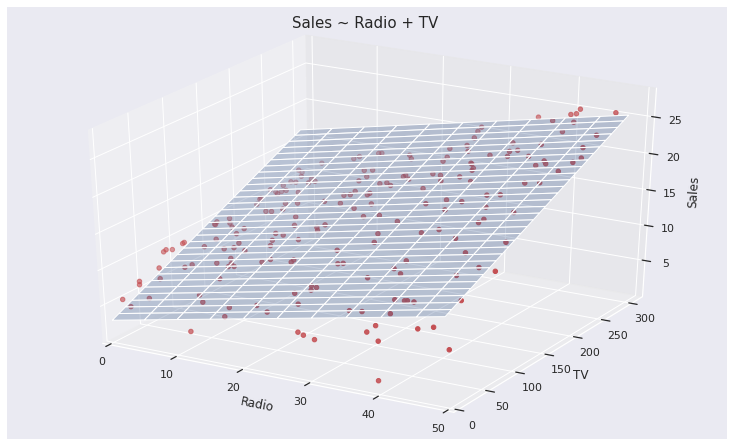

In [35]:
# sns.reset_defaults()
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Sales ~ Radio + TV ', fontsize=15)

ax = axes3d.Axes3D(fig)

ax.plot_surface(w1, w2, Z, rstride=10, cstride=5, alpha=0.3)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

_ = ax.set_xlabel('Radio')
_ = ax.set_xlim(0,50)
_ = ax.set_ylabel('TV')
_ = ax.set_ylim(ymin=0)
_ = ax.set_zlabel('Sales')

In [36]:
# Interaction
est_interact = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          6.68e-146
Time:                        07:55:22   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Calculate RSE
(est_interact.mse_resid) ** 0.5

0.9435154158451168

In [39]:
auto = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 07 11 05 2021/Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [40]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [41]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


## Non-linearity of data

In [42]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']]
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

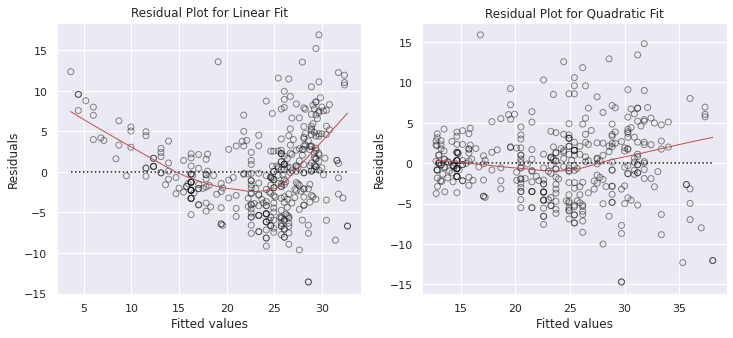

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(x=auto.pred1, y=auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(x=auto.pred2, y=auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

## Collinearity

In [45]:
# Collinearity
credit = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 07 11 05 2021/Data/Credit.csv', usecols=list(range(1,12)))


In [46]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']]
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']]
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)


Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [47]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

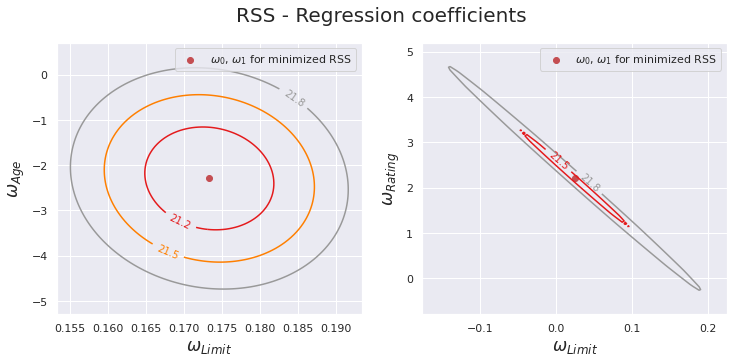

In [48]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\omega_0$, $\omega_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\omega_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\omega_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\omega_{Limit}$', fontsize=17)
    ax.legend()


# Boston dataset information
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- ### RM - average number of rooms per dwelling
- ### AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 1000 dolars 
- PTRATIO - pupil-teacher ratio by town
- B  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- ### LSTAT  % lower status of the population
- ### MEDV - Median value of owner-occupied homes in $1000's

In [49]:
# Boston dataset
boston = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 07 11 05 2021/Data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


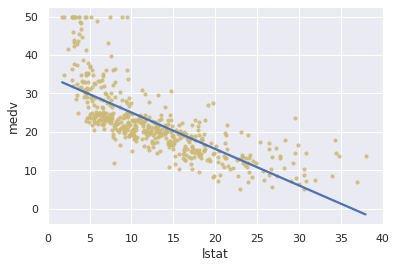

In [50]:
sns.regplot(x=boston.lstat, y=boston.medv, order=1, ci=None, scatter_kws={'color':'y', 's': 10})
_ = plt.xlim(0, 40)

In [51]:
est = smf.ols('medv ~ lstat',data = boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           5.08e-88
Time:                        07:57:26   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

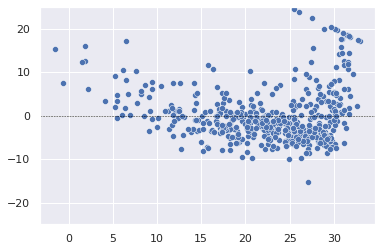

In [52]:
plt.ylim(-25,25)
sns.scatterplot(x=est.fittedvalues, y=est.resid)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black');

In [53]:
# Multiple linear regression
string_cols = ' + '.join(boston.columns[:-1])
est = smf.ols('medv ~ {}'.format(string_cols),data= boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        07:57:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#removing AGE and INDUS
string_cols = ' + '.join(boston.columns[:-1].difference(['age','indus']))
est = smf.ols('medv ~ {}'.format(string_cols),data=boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          5.54e-137
Time:                        07:57:45   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
black          0.0093      0.003      3.475      0.001       0.004       0.015
chas           2.7187      0.854      3.183      0.002       1.040       4.397
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
rad            0.2996      0.063      4.726      0.000       0.175       0.424
rm             3.8016      0.406      9.356      0.000       3.003       4.600
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
zn             0.0458      0.014      3.390      0.001       0.019       0.072
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
boston1 = boston.copy()
boston1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
boston1['lstat*age'] = boston1['lstat'] * boston1['age']
boston1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lstat*age
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,324.696
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,721.146
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,246.233
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,134.652
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,288.886


In [57]:
string_cols = ' + '.join(boston.columns[:-2].difference(['indus']))
string_cols += ' + lstat*age'
est = smf.ols('medv ~ {}'.format(string_cols),data=boston1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.2
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          5.11e-135
Time:                        07:58:02   Log-Likelihood:                -1498.5
No. Observations:                 506   AIC:                             3025.
Df Residuals:                     492   BIC:                             3084.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9660      5.458      6.956      0.000      27.242      48.690
age           -0.0104      0.019     -0.550      0.583      -0.048       0.027
black          0.0092      0.003      3.408      0.001       0.004       0.014
chas           2.7372      0.857      3.194      0.001       1.054       4.421
crim          -0.1121      0.033     -3.384      0.001      -0.177      -0.047
dis           -1.4883      0.195     -7.638      0.000      -1.871      -1.105
nox          -17.7195      3.699     -4.790      0.000     -24.988     -10.451
ptratio       -0.9531      0.130     -7.340      0.000      -1.208      -0.698
rad            0.3020      0.064      4.738      0.000       0.177       0.427
rm             3.7469      0.420      8.912      0.000       2.921       4.573
tax           -0.0118      0.003     -3.500      0.001      -0.018      -0.005
zn             0.0426      0.014      2.994      0.003       0.015       0.071
lstat         -0.6359      0.147     -4.331      0.000      -0.924      -0.347
lstat:age      0.0013      0.002      0.816      0.415      -0.002       0.004
==============================================================================
Omnibus:                      180.069   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.502
Skew:                           1.535   Prob(JB):                    5.48e-175
Kurtosis:                       8.351   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""